
# Project: Investigate a Dataset (tmdb-movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

We are aiming at answering the follwoing questions:

1. What are the most popular genres from year to year? 

2. What are the top 20 longest and shortest Movies?

3. What are the factors that are related to and affecting the top 100 highest revenue movies?

4. Some correlations and findings from the whole dataset collectively.

### Import needed libraries

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
# Data Wrangling


### Loading the data

In [55]:
df=pd.read_csv('tmdb-movies.csv')
df.head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

### Assessing and Cleaning of the Data

In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Now , I will delete the columns ('keywords','homepage','tagline') due to thier data limitation

In [5]:
df.drop(['keywords','homepage','tagline'],axis=1,inplace=True)

Then ,I will delete the null (Nan) values in the dataframe through the columns that contain Nan

In [6]:
df['cast']

0        Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1        Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2        Shailene Woodley|Theo James|Kate Winslet|Ansel...
3        Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4        Vin Diesel|Paul Walker|Jason Statham|Michelle ...
                               ...                        
10861    Michael Hynson|Robert August|Lord 'Tally Ho' B...
10862    James Garner|Eva Marie Saint|Yves Montand|Tosh...
10863    Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...
10864    Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...
10865    Harold P. Warren|Tom Neyman|John Reynolds|Dian...
Name: cast, Length: 10866, dtype: object

In [7]:
#dropping (deleting ) the null rows which contains null in ('cast','imdb_id','overview') columns
df.dropna(inplace=True,subset=['cast','imdb_id','overview' ])

In [8]:
#deleting the null rows of columns ['director'] and ['genres']
df.dropna(inplace=True,subset=['genres','director'])

In [9]:
df.isnull().sum()

id                        0
imdb_id                   0
popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                  0
overview                  0
runtime                   0
genres                    0
production_companies    954
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10725 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10725 non-null  int64  
 1   imdb_id               10725 non-null  object 
 2   popularity            10725 non-null  float64
 3   budget                10725 non-null  int64  
 4   revenue               10725 non-null  int64  
 5   original_title        10725 non-null  object 
 6   cast                  10725 non-null  object 
 7   director              10725 non-null  object 
 8   overview              10725 non-null  object 
 9   runtime               10725 non-null  int64  
 10  genres                10725 non-null  object 
 11  production_companies  9771 non-null   object 
 12  release_date          10725 non-null  object 
 13  vote_count            10725 non-null  int64  
 14  vote_average          10725 non-null  float64
 15  release_year       

Filling Null(Nan) values in production_companies column with 'missing ,as this column is important even if it is containing many missing values

In [11]:
# fill null values in [production_companies] column with 'missing'
df.production_companies.fillna('missing',inplace=True)

In [12]:
#now we have a dataframe without any null and with a new shape (number of rows and columns)
df.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10725 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10725 non-null  int64  
 1   imdb_id               10725 non-null  object 
 2   popularity            10725 non-null  float64
 3   budget                10725 non-null  int64  
 4   revenue               10725 non-null  int64  
 5   original_title        10725 non-null  object 
 6   cast                  10725 non-null  object 
 7   director              10725 non-null  object 
 8   overview              10725 non-null  object 
 9   runtime               10725 non-null  int64  
 10  genres                10725 non-null  object 
 11  production_companies  10725 non-null  object 
 12  release_date          10725 non-null  object 
 13  vote_count            10725 non-null  int64  
 14  vote_average          10725 non-null  float64
 15  release_year       

(None, (10725, 18))

Deleting the duplicated movies

In [13]:
df.duplicated().sum()

1

In [14]:
df.original_title.duplicated().sum()

293

In [15]:
df.drop_duplicates(subset=['original_title'],inplace=True)

In [16]:
df.original_title.duplicated().sum()

0

In [17]:
df.duplicated().sum()

0

Deleting the movies of "Runtime" zero values

In [18]:
#deleting rows of the movies of runtime of zero
df = df[df.runtime != 0]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10405 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10405 non-null  int64  
 1   imdb_id               10405 non-null  object 
 2   popularity            10405 non-null  float64
 3   budget                10405 non-null  int64  
 4   revenue               10405 non-null  int64  
 5   original_title        10405 non-null  object 
 6   cast                  10405 non-null  object 
 7   director              10405 non-null  object 
 8   overview              10405 non-null  object 
 9   runtime               10405 non-null  int64  
 10  genres                10405 non-null  object 
 11  production_companies  10405 non-null  object 
 12  release_date          10405 non-null  object 
 13  vote_count            10405 non-null  int64  
 14  vote_average          10405 non-null  float64
 15  release_year       

In [20]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

Converting "release_date" column to datetime type

In [21]:
df['release_date']=pd.to_datetime(df['release_date'])
df['month'] = df['release_date'].dt.month

In [22]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5


Now we have assessed and cleaned our Dataset

<a id='eda'></a>
## Exploratory Data Analysis

Now we are going to explore and answer the questions regarding the dataset.

In [23]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'month'],
      dtype='object')

## Question 1: Which genres are most popular from year to year?

<font size="3">Combined Genres:<font>

release_year
1960    Animation|Action|Comedy|Family|Science Fiction
1961                   Action|Adventure|Family|Fantasy
1962                               Action|Comedy|Crime
1963                                   Horror|Thriller
1964                                   Horror|Thriller
1965                                     Drama|Romance
1966                                     Drama|History
1967                              Drama|Comedy|Romance
1968                           Drama|Adventure|History
1969             Action|Science Fiction|Thriller|Crime
1970                                     Drama|Romance
1971                                     Action|Comedy
1972                                   Action|Thriller
1973                                             Drama
1974                                     Drama|Romance
1975                                            Action
1976                                    Romance|Comedy
1977                   Action|Adventure|Drama|Thrill

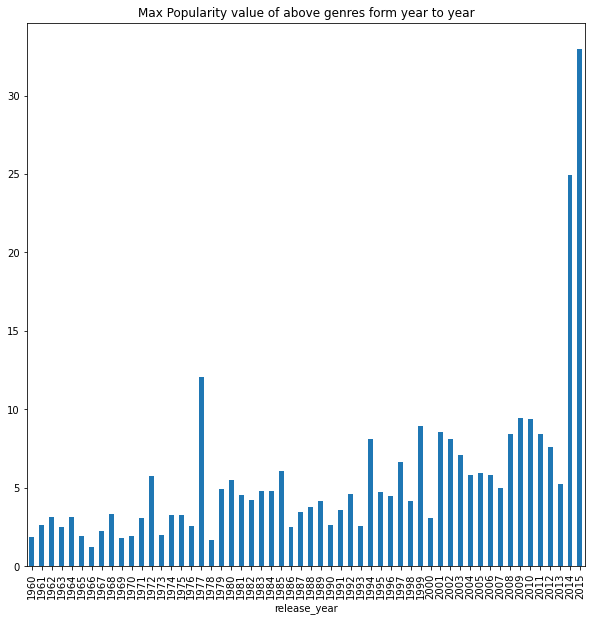

In [24]:

dff=df.groupby('release_year')['popularity'].max().index#.tolist() #xaxis
dff2=df.groupby('release_year')['popularity'].max()#.index#.tolist() #xaxis
dff2.plot.bar(figsize=(10,10))
plt.title("Max Popularity value of above genres form year to year")
df.genres[dff]


<font size="3">Separated Genres:<font>

release_year
1960         Family
1961        Fantasy
1962          Drama
1963    Documentary
1964          Drama
1965        Romance
1966    Documentary
1967         Family
1968         Horror
1969       Thriller
1970         Horror
1971         Action
1972      Adventure
1973          Drama
1974         Horror
1975         Action
1976         Comedy
1977         Horror
1978       Thriller
1979       Thriller
1980         Horror
1981        Mystery
1982         Comedy
1983          Drama
1984        Romance
1985        History
1986          Drama
1987        Fantasy
1988         Comedy
1989      Adventure
1990         Horror
1991         Action
1992         Comedy
1993         Comedy
1994         Horror
1995         Action
1996        Fantasy
1997         Comedy
1998         Horror
1999        Mystery
2000          Drama
2001        Romance
2002         Comedy
2003         Horror
2004       Thriller
2005         Horror
2006        Romance
2007         Action
2008         Comedy
2009   

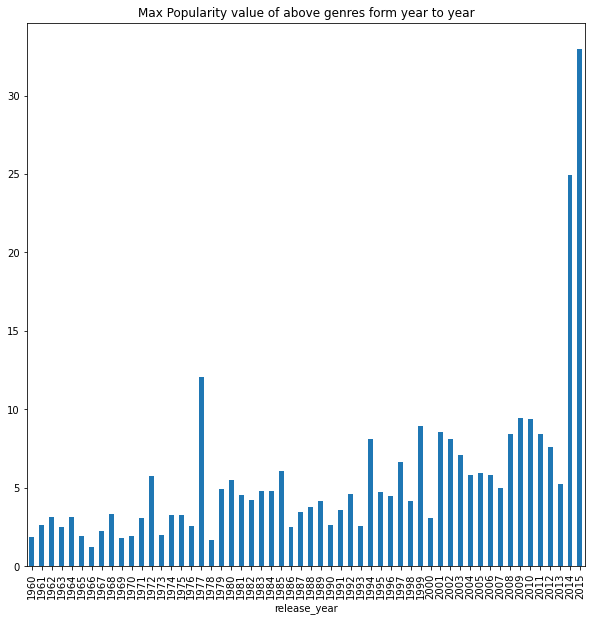

In [25]:
df_gen_exp=df.copy()
splitgen=['genres']
for g in splitgen:
    df_gen_exp[g]=df_gen_exp[g].apply(lambda x: x.split("|"))
df_gen_exp=df_gen_exp.explode('genres',ignore_index=True)


dfff=df_gen_exp.groupby('release_year')['popularity'].max().index#.tolist() #xaxis
dfff2=df_gen_exp.groupby('release_year')['popularity'].max()#.index#.tolist() #xaxis
#target_gen=df.popularity[dff]#.plot(kind='bar')
#print(target_gen)
#target_gen.plot.bar()
dfff2.plot.bar(figsize=(10,10))
plt.title("Max Popularity value of above genres form year to year")
df_gen_exp.genres[dff]



## Question 2: Top 20 Longest and shortest movies?

In [26]:
def sortandplot20 (column1,column2,order):
    result=df.sort_values(column1,ascending =order).head(20)
    pl=sns.barplot(x=column1,y=column2,data=result)
    title=plt.title ("Top 20 Longest {}".format(column1))
    yl=plt.ylabel("{}".format(column2))
    xl=plt.xlabel("{}".format(column1))
    return result,pl,title,yl,xl
    

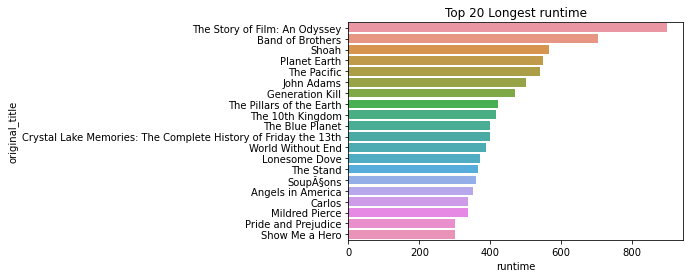

In [27]:
sortandplot20('runtime','original_title',False)
plt.show()

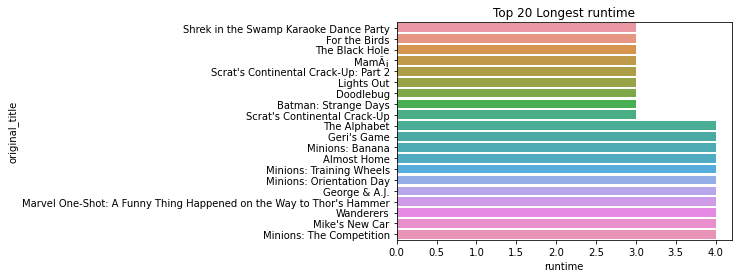

In [28]:
sortandplot20('runtime','original_title',True)
plt.show()

## Question3: Top 100 movies of highest revenue and factors that are associated with it?

In [29]:
top100rev=df.sort_values('revenue',ascending=False).head(100)
top100rev.original_title

1386                          Avatar
3       Star Wars: The Force Awakens
5231                         Titanic
4361                    The Avengers
0                     Jurassic World
                    ...             
1920                      Iron Man 2
7389                     Ratatouille
629                     Interstellar
7073       The Passion of the Christ
2884                      Mamma Mia!
Name: original_title, Length: 100, dtype: object

### (Release Month) effect:

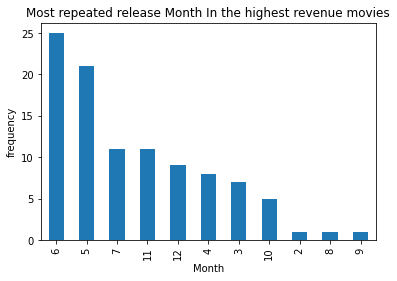

In [30]:
#which month in which most of the high revenue movies are produced:
top100rev.month.value_counts().plot(kind='bar')
plt.title("Most repeated release Month In the highest revenue movies")
plt.xlabel("Month")
plt.ylabel("frequency")
plt.show()

### (Release Year) effect: 

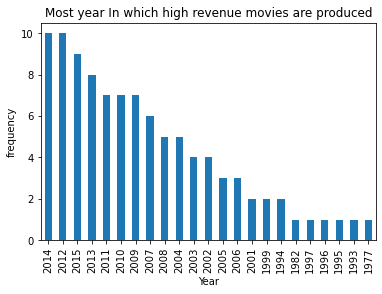

In [31]:
#which year in which most of the high revenue movies are produced:
top100rev.release_year.value_counts().plot(kind='bar')
plt.title("Most year In which high revenue movies are produced")
plt.xlabel("Year")
plt.ylabel("frequency")
plt.show()

In [32]:
top100rev.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
count,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000
mean,42336.640000,5.156102,1.532550e+08,8.913146e+08,130.130000,3449.420000,6.896000,2007.920000,1.561334e+08,9.596516e+08,6.830000
std,55519.390966,4.474192,6.771552e+07,3.179957e+08,25.108112,1858.863969,0.652256,6.798217,6.322364e+07,4.043112e+08,2.781813
min,11.000000,0.436803,1.050000e+07,6.098416e+08,88.000000,201.000000,5.600000,1977.000000,2.372625e+07,5.726906e+08,2.000000
25%,673.750000,2.722714,1.087500e+08,7.093323e+08,110.250000,2193.250000,6.400000,2004.750000,1.143886e+08,7.044446e+08,5.000000
50%,11893.000000,4.212462,1.500000e+08,7.959344e+08,132.000000,3155.500000,6.900000,2010.000000,1.565855e+08,8.627570e+08,6.000000
75%,63838.500000,6.022558,2.000000e+08,9.559398e+08,144.250000,4266.000000,7.400000,2013.000000,1.924616e+08,1.062122e+09,9.250000
max,211672.000000,32.985763,3.800000e+08,2.781506e+09,201.000000,9767.000000,8.100000,2015.000000,3.683713e+08,2.827124e+09,12.000000


##### From the previous table we can notice that the highest revenue movies are associated with the follwowing factors:

1. They have an average popularity of 5.156102

2. Average of 153 Million Dollars budget.

3. Runtime avergae of 130 Minutes.

4. Vote average of 6.8

5. Movies release in June are more likely to achieve high revenue.

### Now we will investigate more about the factors of high revenue movies:

In [33]:
top100rev.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'month'],
      dtype='object')

### (Director) effect:

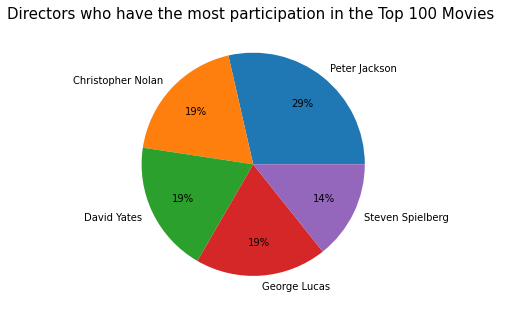

In [34]:
top100rev.director.value_counts().head(5).plot(kind='pie',autopct='%1.0f%%', pctdistance=0.7,figsize=(5,10),ylabel="")
plt.title("Directors who have the most participation in the Top 100 Movies ",fontsize=15)
plt.show()

### (Cast) effect: 

In [35]:
top100rev.cast.value_counts()


Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                    3
Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks    3
Kristen Stewart|Robert Pattinson|Taylor Lautner|Ashley Greene|Peter Facinelli       2
Mike Myers|Eddie Murphy|Cameron Diaz|Julie Andrews|Antonio Banderas                 2
Ewan McGregor|Natalie Portman|Hayden Christensen|Ian McDiarmid|Samuel L. Jackson    2
                                                                                   ..
Mia Wasikowska|Johnny Depp|Anne Hathaway|Helena Bonham Carter|Crispin Glover        1
Tom Cruise|Jeremy Renner|Simon Pegg|Rebecca Ferguson|Ving Rhames                    1
Jack Black|Dustin Hoffman|Angelina Jolie|Jackie Chan|Lucy Liu                       1
Angelina Jolie|Elle Fanning|Juno Temple|Sharlto Copley|Isobelle Molloy              1
Tobey Maguire|Kirsten Dunst|James Franco|Thomas Haden Church|Topher Grace           1
Name: cast, Length: 92, dtype: int64

### (Actor or Actress) effect: 

In [36]:
top100revcopy=top100rev.copy()

In [37]:
split=['cast']
for c in split:
    top100revcopy[c]=top100revcopy[c].apply(lambda x: x.split("|"))

In [38]:
top100rev2=top100revcopy.explode('cast',ignore_index=True)
top100rev2.cast.value_counts()

Ian McKellen        8
Daniel Radcliffe    8
Emma Watson         8
Rupert Grint        8
Orlando Bloom       6
                   ..
Emma Thompson       1
Mia Wasikowska      1
Amy Poehler         1
Tommy Lee Jones     1
Mary McDonnell      1
Name: cast, Length: 306, dtype: int64

### (Genre) effect: 

In [39]:
split2=['genres']
for b in split2:
    top100revcopy[b]=top100revcopy[b].apply(lambda x: x.split("|"))
 

In [40]:
top100rev3=top100revcopy.explode('genres',ignore_index=True)

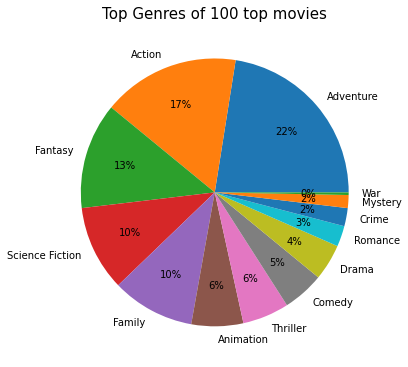

In [41]:
top100rev3.genres.value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=0.7,figsize=(6,10),ylabel="")
plt.title ("Top Genres of 100 top movies",fontsize=15)
plt.show()

### (combined genres) effect: 

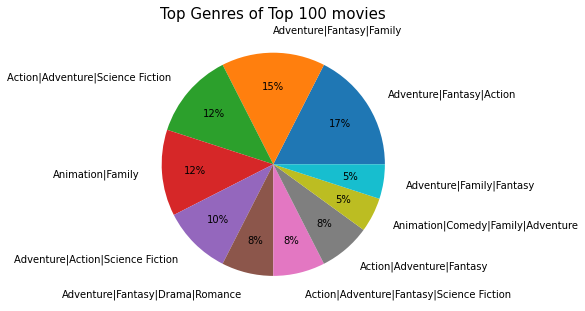

In [42]:
top100rev.genres.value_counts().head(10).plot(ylabel="",kind='pie', autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.2,figsize=(5,10))
plt.title("Top Genres of Top 100 movies",fontsize=15)
plt.show()

## Question 4: Correlations and explorations (for all the dataset collectively)

In [43]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'month'],
      dtype='object')

In [44]:
def correlationplot(column1,column2):
    x=df[column1]
    y=df[column2]
    sc=plt.scatter(x, y)
    re=plt.plot(np.unique(x),np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
    tit=plt.title('relation between {} and {} '.format(column1,column2))
    #xll=plt.xlabel('{}'.format(column1))
    yll=plt.ylabel('{}'.format(column2)+" (Billion Dollars)")
   
    return sc,re,tit,yll

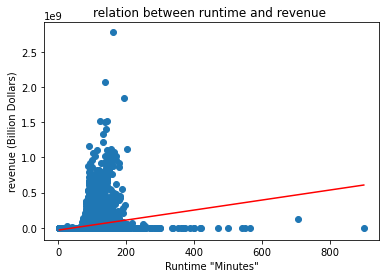

In [45]:
correlationplot('runtime','revenue')
plt.xlabel('Runtime "Minutes"')
plt.show()

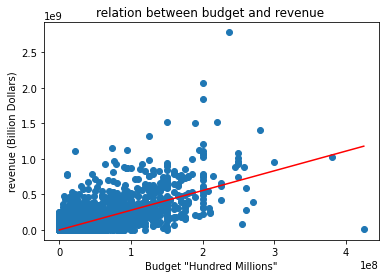

In [46]:
correlationplot('budget','revenue')
plt.xlabel('Budget "Hundred Millions"')
plt.show()

the more the budget ,the more the achieved revenue

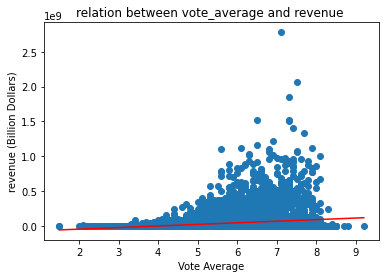

In [47]:
correlationplot('vote_average','revenue')
plt.xlabel('Vote Average')
plt.show()

By increasing the vote average of the movie ,the more the revenue

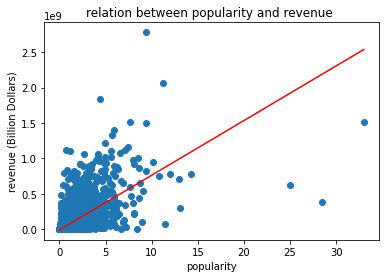

In [48]:
correlationplot('popularity','revenue')
plt.xlabel('popularity')
plt.show()

The more the movie is popular ,the more the revenue it achieves

In [49]:
df.director.value_counts()

Woody Allen                    44
Clint Eastwood                 33
Steven Spielberg               29
Martin Scorsese                28
Ron Howard                     22
                               ..
Kevin Hamedani                  1
James Orr                       1
Vicky Jenson|Andrew Adamson     1
Rob Williams                    1
Paddy Considine                 1
Name: director, Length: 4929, dtype: int64

In [50]:
df_cast_exp=df.copy()
split3=['cast']
for actor in split3:
    df_cast_exp[actor]=df_cast_exp[actor].apply(lambda x: x.split("|"))

df_cast_exp=df_cast_exp.explode('cast',ignore_index=True)
df_cast_exp.cast.value_counts() 

Samuel L. Jackson    71
Robert De Niro       70
Bruce Willis         62
Nicolas Cage         61
Robin Williams       51
                     ..
Baek Do-bin           1
Paul Scheer           1
Fulton Mackay         1
Polly Adams           1
Kobe Bryant           1
Name: cast, Length: 18527, dtype: int64

In [51]:
df_genres_exp=df.copy()
split4=['genres']
for genre in split4:
    df_genres_exp[genre]=df_genres_exp[genre].apply(lambda x: x.split("|"))

df_genres_exp=df_genres_exp.explode('genres',ignore_index=True)
df_genres_exp.genres.value_counts() 

Drama              4600
Comedy             3702
Thriller           2792
Action             2299
Romance            1653
Horror             1549
Adventure          1416
Crime              1310
Science Fiction    1175
Family             1172
Fantasy             872
Mystery             762
Animation           653
Documentary         460
Music               383
History             322
War                 262
Foreign             179
Western             162
TV Movie            154
Name: genres, dtype: int64

In [52]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'month'],
      dtype='object')

In [53]:
df_comp_exp=df.copy()
split5=['production_companies']
for comp in split5:
    df_comp_exp[comp]=df_comp_exp[comp].apply(lambda x: x.split("|"))

df_comp_exp=df_comp_exp.explode('production_companies',ignore_index=True)
df_comp_exp.production_companies.value_counts() 

missing                                   930
Universal Pictures                        510
Warner Bros.                              497
Paramount Pictures                        409
Twentieth Century Fox Film Corporation    269
                                         ... 
HW Two                                      1
Pact Productions                            1
Peach Trees                                 1
Double Windsor Films                        1
Lago Films                                  1
Name: production_companies, Length: 7687, dtype: int64

<a id='conclusions'></a>
## Conclusions



### Question 1: Which genres are most popular from year to year?

From analysis we were able to know both combined and single Genres that were most popular each year from 1960 to 2015 as shown in the exploration section.

A bar graph representing the popularity score changing over the years is also provided. 


### Question 2: Top 20 Longest and shortest movies? 

From analysis ,we represented the longest 20 movies topped by the movie which exceeded 800 minutes ,to the shortest movies that didn't exceed 3 minutes which may be considered short films. 

Movies names along with thier corressponding runtime are represented by graphs for both ,longest and shortest 20 movies.  

### Question3: Top 100 movies of highest revenue and factors that are associated with it?

In this question ,we could find the following observations:

1. **(Release month)** seems to affect the revenue as most of the top 100 revenue movies were released in June. 

2. **(Release Year)** also has an impact ,as through the years ,the revenue is increasing.Accordingly we found that most of the high revenue movies were released in 2014.

3. High revenue movies have an average **popularity** of 5.156102

4. They have an average of 153 Million Dollars **budget**.

5. **Runtime** avergae of 130 Minutes.

6. **Vote average** of 6.8

7. **Director** (Peter Jackson) participated in 29% of the top 100 highest revenue movies.

8. **Cast** of (Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks) is the most participating cast in the top 100 highest revenue movies.

9. **Rupert Grint**,Emma Watson ,Ian McKellen,Daniel Radcliffe,Orlando Bloom are the **actors** who have the most frequent presence in the top 100 highest revenue movies.

10. **(Adventure)** is the top genre among the genres of Top 100 highest revenue movies.

### Question 4: Correlations and explorations (for all the dataset collectively)


1. Positive correlation between **runtime** and **revenue** of the movies .The more the runtime ,the more the revenue.

2. Positive Correlation between **budget** and **revenue**,The more the buget set to the movie ,The more revenue expected to be achieved.

3. **Average vote** and **popularity** of the movie are playing role in the revenue (Positive correlation).

4. **(Woody Allen)** is the most participating director in the whole movies ,Followed by **(Clint Eastwood)**.

5. **Samuel L. Jackson**,Robert De Niro ,Bruce Willis,Nicolas Cage,Robin Williams are the top partcipating **actors** in the whole movies.

6. **Drama** is the top frequent **genre** in the whole movies.

7. **Universal Pictures**,Warner Bros,Paramount Pictures are the top **production companies** in the industry.

### Limitations

1. One important limitation in the exploration is that a lot of data regarding (Production Companies) are missing.This could have added another insight if it was complete.